## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
data = load_boston()
X, y = data['data'], data['target']
import random
def price(rm,k,b):
    return k*rm+b

1. random selection

In [2]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

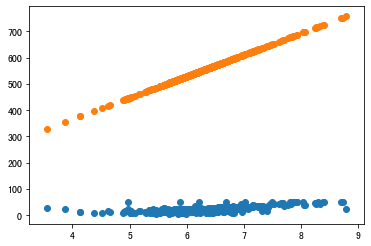

In [3]:
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random = [price(r,k,b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random)


In [4]:
def deviation_loss(y,y_hat):
    return mean([y[i]-y_hat[i] for i in range(len(y))])
def mse_loss(y,y_hat):
    return mean([(y[i]-y_hat[i])**2 for i in range(len(y))])
def abs_loss(y,y_hat):
    return mean([abs(y[i]-y_hat[i]) for i in range(len(y))])
def mean(a):
    return sum(a)/len(a)

In [5]:

try_times = 2000
min_loss = float('inf')
best_k , best_b = None, None

for i in range(try_times):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    price_hat = [price(r,k,b) for r in X_rm]
    current_loss = deviation_loss(y, price_hat)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 81 best_b: 5, and the loss is: -491.52257905138316
When time is : 14, get best_k: 92 best_b: -17, and the loss is: -538.6535573122532
When time is : 32, get best_k: 99 best_b: -42, and the loss is: -557.6459980237154
When time is : 46, get best_k: 86 best_b: 92, and the loss is: -609.9457509881421
When time is : 49, get best_k: 96 best_b: 48, and the loss is: -628.7920948616592
When time is : 96, get best_k: 94 best_b: 83, and the loss is: -651.2228260869559
When time is : 376, get best_k: 100 best_b: 62, and the loss is: -667.9306324110681
When time is : 727, get best_k: 98 best_b: 87, and the loss is: -680.361363636363
When time is : 774, get best_k: 100 best_b: 82, and the loss is: -687.930632411068


In [6]:
min_loss = float('inf')
trying_times = 1000
best_k = random.randint(-100,100)
best_b = random.randint(-100,100)

direction = [(i,j) for i in (1,-1) for j in (1,-1)]

next_direction = random.choice(direction)

scalar = 0.1
for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = deviation_loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: -59.1 best_b: -76.1, and the loss is: 470.05469861660055
When time is : 2, get best_k: -59.0 best_b: -76.0, and the loss is: 469.3262351778659
When time is : 3, get best_k: -58.9 best_b: -75.9, and the loss is: 468.5977717391304
When time is : 4, get best_k: -58.8 best_b: -75.80000000000001, and the loss is: 467.8693083003955
When time is : 5, get best_k: -58.699999999999996 best_b: -75.70000000000002, and the loss is: 467.14084486166036
When time is : 6, get best_k: -58.599999999999994 best_b: -75.60000000000002, and the loss is: 466.4123814229252
When time is : 7, get best_k: -58.49999999999999 best_b: -75.50000000000003, and the loss is: 465.6839179841899
When time is : 8, get best_k: -58.39999999999999 best_b: -75.40000000000003, and the loss is: 464.95545454545424
When time is : 9, get best_k: -58.29999999999999 best_b: -75.30000000000004, and the loss is: 464.22699110671897
When time is : 10, get best_k: -58.19999999999999 best_b: -75.20000000000005,

When time is : 305, get best_k: -28.69999999999957 best_b: -45.70000000000042, and the loss is: 248.60181324110462
When time is : 306, get best_k: -28.599999999999568 best_b: -45.60000000000042, and the loss is: 247.87334980236935
When time is : 307, get best_k: -28.499999999999567 best_b: -45.50000000000042, and the loss is: 247.1448863636341
When time is : 308, get best_k: -28.399999999999565 best_b: -45.40000000000042, and the loss is: 246.41642292489868
When time is : 309, get best_k: -28.299999999999564 best_b: -45.300000000000416, and the loss is: 245.68795948616355
When time is : 310, get best_k: -28.199999999999562 best_b: -45.200000000000415, and the loss is: 244.95949604742893
When time is : 311, get best_k: -28.09999999999956 best_b: -45.10000000000041, and the loss is: 244.2310326086932
When time is : 312, get best_k: -27.99999999999956 best_b: -45.00000000000041, and the loss is: 243.5025691699582
When time is : 313, get best_k: -27.899999999999558 best_b: -44.900000000000

When time is : 648, get best_k: 5.600000000000566 best_b: -11.400000000000016, and the loss is: -1.2611462450628306
When time is : 649, get best_k: 5.700000000000566 best_b: -11.300000000000017, and the loss is: -1.9896096837980037
When time is : 650, get best_k: 5.800000000000566 best_b: -11.200000000000017, and the loss is: -2.7180731225331827
When time is : 651, get best_k: 5.900000000000565 best_b: -11.100000000000017, and the loss is: -3.446536561268358
When time is : 652, get best_k: 6.000000000000565 best_b: -11.000000000000018, and the loss is: -4.175000000003532
When time is : 653, get best_k: 6.1000000000005645 best_b: -10.900000000000018, and the loss is: -4.903463438738708
When time is : 654, get best_k: 6.200000000000564 best_b: -10.800000000000018, and the loss is: -5.63192687747388
When time is : 655, get best_k: 6.300000000000564 best_b: -10.700000000000019, and the loss is: -6.360390316209057
When time is : 656, get best_k: 6.4000000000005635 best_b: -10.60000000000002

When time is : 938, get best_k: 34.60000000000079 best_b: 17.59999999999994, and the loss is: -212.51554347826567
When time is : 939, get best_k: 34.70000000000079 best_b: 17.699999999999942, and the loss is: -213.24400691700095
When time is : 940, get best_k: 34.80000000000079 best_b: 17.799999999999944, and the loss is: -213.97247035573645
When time is : 941, get best_k: 34.900000000000794 best_b: 17.899999999999945, and the loss is: -214.70093379447133
When time is : 942, get best_k: 35.000000000000796 best_b: 17.999999999999947, and the loss is: -215.42939723320654
When time is : 943, get best_k: 35.1000000000008 best_b: 18.099999999999948, and the loss is: -216.15786067194182
When time is : 944, get best_k: 35.2000000000008 best_b: 18.19999999999995, and the loss is: -216.88632411067667
When time is : 945, get best_k: 35.3000000000008 best_b: 18.29999999999995, and the loss is: -217.61478754941217
When time is : 946, get best_k: 35.4000000000008 best_b: 18.399999999999952, and the

In [7]:
def compute_gradient(x,y,k,b,loss_func,delta = 0.0001):
    y_hat =  [price(r, k, b) for r in x]
    delta_y_hat_b = [price(r,k,b+delta) for r in x]
    delta_y_hat_k = [price(r,k+delta,b) for r in x]
    o_loss = loss_func(y,y_hat)
    b_delta_loss = loss_func(y,delta_y_hat_b)
    k_delta_loss = loss_func(y,delta_y_hat_k)
    return (k_delta_loss-o_loss)/delta, (b_delta_loss-o_loss/delta)
trying_times = 1000
best_loss = float('inf')
best_k = random.randint(-100,100)
best_b = random.randint(-100,100)
learning_rate = 0.01
for i in range(trying_times):
    k_gradient, b_gradient = compute_gradient(X_rm,y,best_k,best_b,deviation_loss)
    current_k,current_b = best_k-learning_rate*k_gradient , best_b-learning_rate*b_gradient
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = deviation_loss(y, price_by_k_and_b)
    if current_loss< best_loss:
        best_loss = current_loss
        print(current_loss,current_k,current_b)
    best_b = current_b
    best_k = current_k

-44833.26919753064 -53.937153656173905 45194.77729447825
-439322067.31246924 -53.81146073241689 439322428.030632
-4304925767929.7017 -53.69062423606374 4304925768289.6606
-4.218405412895122e+16 -53.59296798606374 4.218405412895138e+16
-4.133623943090854e+20 -53.59296798606374 4.133623943090843e+20
-4.0505464104188606e+24 -53.59296798606374 4.0505464104188757e+24
-3.969138569167719e+28 -53.59296798606374 3.969138569167729e+28
-3.889366861896018e+32 -53.59296798606374 3.889366861895999e+32
-3.8111984055993e+36 -53.59296798606374 3.8111984055993166e+36
-3.7346009781554777e+40 -53.59296798606374 3.7346009781555203e+40
-3.659543005042543e+44 -53.59296798606374 3.6595430050425085e+44
-3.585993546322679e+48 -53.59296798606374 3.585993546322653e+48
-3.513922283888603e+52 -53.59296798606374 3.5139222838886013e+52
-3.443299508966183e+56 -53.59296798606374 3.443299508966216e+56
-3.3740961098679596e+60 -53.59296798606374 3.3740961098679474e+60
-3.3062835599927876e+64 -53.59296798606374 3.306283559

/home/chihao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/home/chihao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 特征与标签之间复杂的函数公式往往难以直接观察出来, 所以需要用机器学习方法帮助我们选择出一个最优的函数映射关系.

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 效果完全随机, 需要不断地迭代.

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:第二个有监督方向更好一些,保证每次更新都是朝着一个更优的点. 但容易陷入局部最优点

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 导数/梯度 决定了函数沿着方向轴变化的方向. 有了导数,可以更精确地决定参数更新的方向

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: 梯度, 是目标函数对某个方向轴的微分.沿着梯度的反方向更新参数, 可以让目标函数的值下降.因此是梯度下降法

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: 确保了每次迭代都能离最优点/局部最优点 更进一步

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:机器学习即是让计算机自动寻找到一个函数.能够拟合出特征和标签的映射关系

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [8]:
import requests
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
req = requests.get('https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485',headers=headers)
req.encoding = 'utf-8'
res = req.text 

In [9]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(res)

In [10]:
import re 
lines_re = r'<a target=_blank href="(/item/(%\w+)+)">(北京地铁\w+线)'
pattern = re.compile(lines_re)
re_res = pattern.findall(res)

In [11]:
lines_dict = {}
for i in re_res:
    lines_dict[i[2]] = i[0]

In [12]:
lines_dict

{'北京地铁1号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '北京地铁13号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 '北京地铁八通线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
 '北京地铁5号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁8号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁机场线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
 '北京地铁4号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁15号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
 '北京地铁昌平线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF',
 '北京地铁大兴线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%A4%A7%E5%85%B4%E7%BA%BF',
 '北京地铁房山线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1%B1%E7%BA%BF',
 '北京地铁亦庄线': '/item/%E5%8C%97%E

In [13]:
lines_res = []
for line,url in lines_dict.items():
    result = []
    line_response = requests.get('https://baike.baidu.com'+lines_dict[line],headers=headers)
    line_response.encoding = 'utf-8'
    line_res = line_response.text
    bs = BeautifulSoup(line_res)
    bs_res = list(bs.find_all('td'))
    re_str = r'>(\w+站)</a>'
    pat = re.compile(re_str)
    for sl in bs_res:
        station = pat.findall(str(sl))
        if station and (station[0] not in result):
            result.append(station[0])
    lines_res.append(result)
print(lines_res)

[['黑石头站', '高井站', '福寿岭站', '苹果园站', '古城站', '衙门口站', '八角游乐园站', '八宝山站', '玉泉路站', '五棵松站', '万寿路站', '公主坟站', '军事博物馆站', '木樨地站', '南礼士路站', '复兴门站', '西单站', '天安门西站', '天安门东站', '王府井站', '东单站', '建国门站', '永安里站', '国贸站', '大望路站', '四惠站', '四惠东站', '高碑店站', '传媒大学站', '双桥站', '管庄站', '八里桥站', '通州北苑站', '果园站', '九棵树站', '梨园站', '临河里站', '土桥站', '花庄站'], ['西直门站', '大钟寺站', '知春路站', '五道口站', '上地站', '西二旗站', '龙泽站', '回龙观站', '霍营站', '立水桥站', '北苑站', '望京西站', '芍药居站', '光熙门站', '柳芳站', '东直门站'], ['四惠站', '四惠东站', '高碑店站', '传媒大学站', '双桥站', '管庄站', '八里桥站', '通州北苑站', '果园站', '九棵树站', '梨园站', '临河里站', '土桥站', '环球影城站'], ['宋家庄站', '刘家窑站', '蒲黄榆站', '天坛东门站', '磁器口站', '崇文门站', '东单站', '灯市口站', '东四站', '张自忠路站', '北新桥站', '雍和宫站', '和平里北街站', '和平西桥站', '惠新西街南口站', '惠新西街北口站', '大屯路东站', '北苑路北站', '立水桥南站', '立水桥站', '天通苑南站', '天通苑站', '天通苑北站', '平西府站', '平坊站', '马坊站'], ['朱辛庄站', '育知路站', '平西府站', '回龙观东大街站', '霍营站', '育新站', '西小口站', '永泰庄站', '林萃桥站', '森林公园南门站', '奥林匹克公园站', '奥体中心站', '北土城站', '安华桥站', '安德里北街站', '鼓楼大街站', '什刹海站', '南锣鼓巷站', '中国美术馆站', '金鱼胡同站', '王府井站', '前门站', '珠市口站', '天桥站', '永定门外站', '木樨园站', '海户屯站',

In [14]:
from collections import defaultdict
connection_map = defaultdict(set)
for line in lines_res:
    for i,station in enumerate(line):
        if i == 0:
            connection_map[station].add(line[i+1])
        elif i == len(line)-1:
            connection_map[station].add(line[i-1])
        else:
            connection_map[station].add(line[i-1])
            connection_map[station].add(line[i+1])

In [15]:
import ast
import time

In [22]:
city_location = {}
key = "EM7BZ-BH5WU-JAWVE-22XVP-XNCYS-KBFG4"
sk = "S1FrJEtStGYktJsa1CMiRcePqZPRaXj"
for station in connection_map.keys():
    htp = "https://apis.map.qq.com/ws/geocoder/v1/?address={}地铁站&key={}&region=北京".format(station.split('站'),key)
    positon_req = requests.get(htp)
    positon_dict = ast.literal_eval(positon_req.text)
    city_location[station] = (positon_dict['result']['location']['lng'],positon_dict['result']['location']['lat'])

In [17]:
%pdb

Automatic pdb calling has been turned ON


%pdb

/home/chihao/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


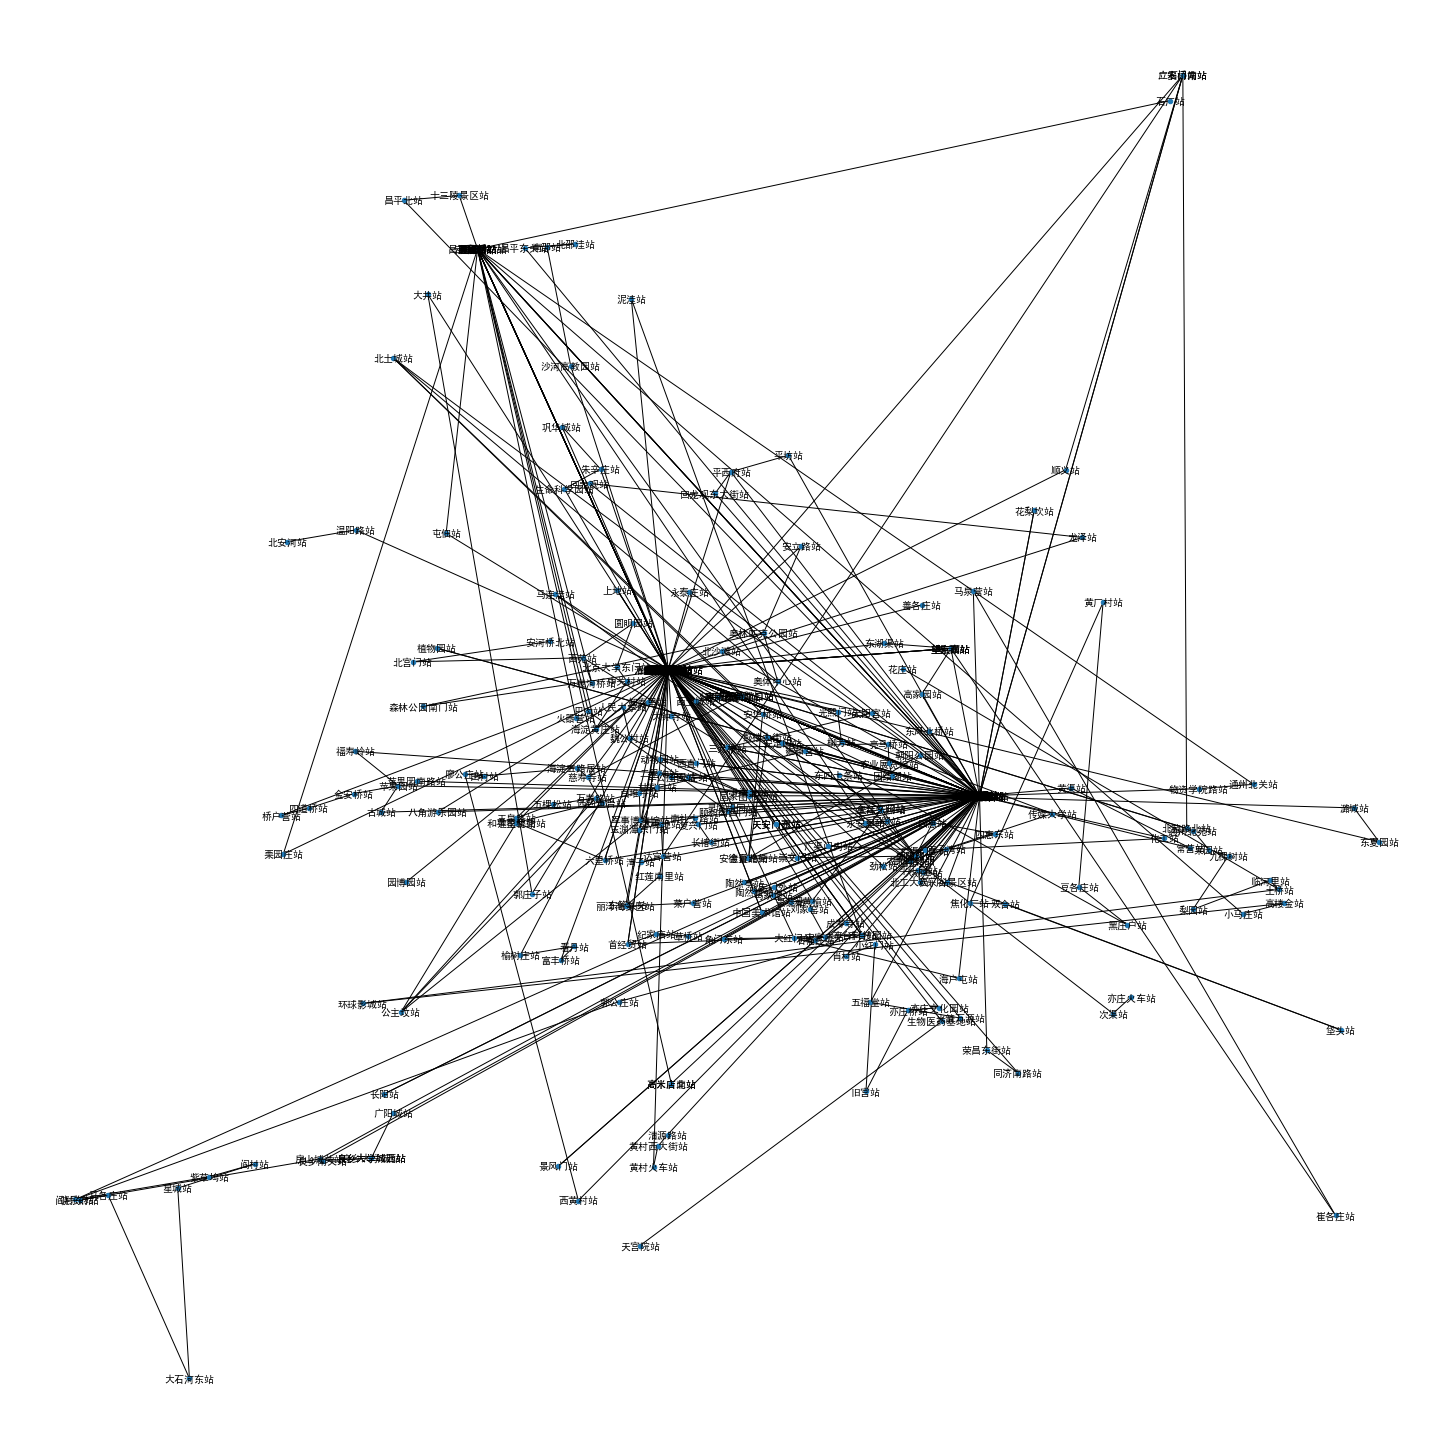

In [23]:
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline
subway = nx.Graph(connection_map)
plt.figure(figsize=(20,20))
nx.draw(subway,city_location,with_labels=True,node_size = 20,font_size = 10)

由于查询结果不精确和地图精度问题. 地图效果并不好

In [19]:
def search(start,end,connection):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        next_stations = connection[frontier]
        for ns in next_stations:
            if ns in path:
                continue
                
            else:
                new_path = path+[ns]
                pathes.append(new_path)
                
                if ns == end:
                    return new_path
        pathes = sorted(pathes,key=len)
        
search('车公庄西站','公益西桥站',connection_map)

['车公庄西站',
 '车公庄站',
 '阜成门站',
 '复兴门站',
 '西单站',
 '宣武门站',
 '菜市口站',
 '陶然亭站',
 '北京南站',
 '马家堡站',
 '角门西站',
 '公益西桥站']

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)